In [131]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pylab as plt
import glob
import os
import numpy as np

### Plot test sets auc and F1 across splits. 

In [132]:

def test_auc(tf_path):
    """Take a tf output path and create a list of values for the validtion auc of an experement"""
    auc = []
    for event in summary_iterator(tf_path):
        for value in event.summary.value:
            if value.tag == "final/F1":
                auc.append(value.simple_value)
    return auc

def plot_splits(root_dir,ax,data_size,c,label=None, marker="o"):
    # Set the root directory to search
    all_aucs = []
    file_extension = "*.gpu1"
    # Recursively traverse the directory and its subdirectories
    for subdir, _, files in os.walk(root_dir):
        # Use glob to find all files with the specified extension
        for file in glob.glob(os.path.join(subdir, file_extension)):
            auc = test_auc(file)
            all_aucs.append(auc[0])
    # plot mean and range  
    mean = np.mean(all_aucs,axis=0)
    std = np.std(all_aucs,axis=0)
    standard_error = std/np.sqrt(len(all_aucs))
    ax.errorbar(data_size,mean,yerr=standard_error, fmt='o',capsize=5,alpha=1,c=c, label=label, marker=marker)
    # ax.set_ylim(0.5,1)
    # ax.set_xscale('log')
    # if root_dir == "../results_20X/Bracs/Bracs_random_4_s1":
    ax.set_xlabel("Number of pre-training images",fontsize=12)
    ax.set_ylabel("Test F1", fontsize=12)
    
    ax.set_xticks([1,1280000,2500000])
    ax.set_xticklabels([0, '1.28M', '2.5M'])
    
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

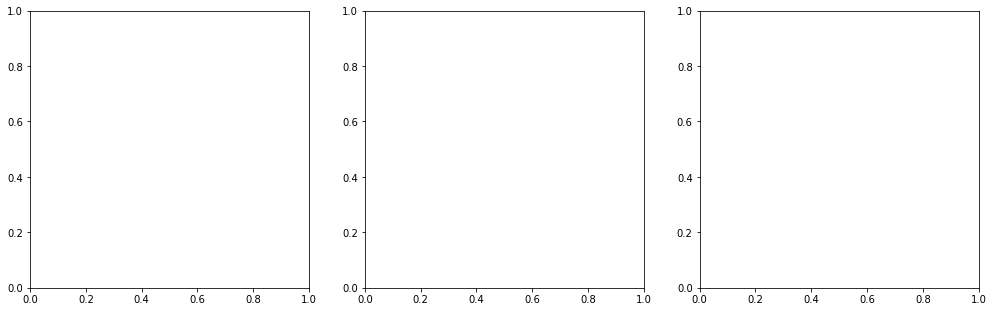

In [133]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5.1)) #was 18 11
fig.patch.set_facecolor('white')

### BRACS

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


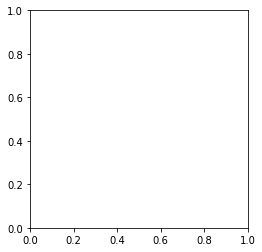

In [134]:
# Bracs  
root_dir = "../results_20X/Bracs/Bracs_random_4_s1"
data_size = 1
plot_splits(root_dir,axes[0],data_size,"black", "Randomly initialized weights", "s")

root_dir = "../results_20X/Bracs/Bracs_imagenet_supervised_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0],data_size,"salmon", "ImageNet SL","D")

root_dir = "../results_20X/Bracs/Bracs_imagenet_dino_baseline_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0],data_size,"dodgerblue", "ImageNet SSL")

root_dir = "../results_20X/Bracs/Bracs_FlockNet1X_4_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[0],data_size,"springgreen", "BEVNet1X SSL", marker='^')

root_dir = "../results_20X/Bracs/Bracs_FlockNet2X_4_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[0],data_size,"springgreen", "BEVNet2X 100 epoch SSL", marker='x')


root_dir = "../results_20X/Bracs/Bracs_FlockNet2X_half_4_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[0],data_size,"pink", "BEVNet2X 50 epoch SSL", marker='^')

### HunCRC

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


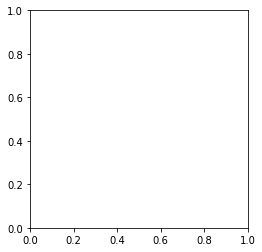

In [135]:
# ##### HunCRC experement #####
root_dir = "../results_20X/HunCRC/HunCRC_random_3_s1"
data_size = 1
plot_splits(root_dir,axes[1],data_size,"black", "random","s")

root_dir = "../results_20X/HunCRC/HunCRC_imagenet_supervised_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1],data_size,"salmon", "ResNet50 DINO imagenet", "D")

root_dir = "../results_20X/HunCRC/HunCRC_imagenet_dino_baseline_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1],data_size,"dodgerblue", "ResNet50 DINO imagenet")

root_dir = "../results_20X/HunCRC/HunCRC_FlockNet1X_3_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[1],data_size,"springgreen", "ResNet50 DINO imagenet",'^')


root_dir = "../results_20X/HunCRC/HunCRC_FlockNet2X_half_3_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[1],data_size,"pink", "ResNet50 DINO imagenet",'^')



root_dir = "../results_20X/HunCRC/HunCRC_FlockNet2X_3_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[1],data_size,"springgreen", "ResNet50 DINO imagenet",'x')



/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.


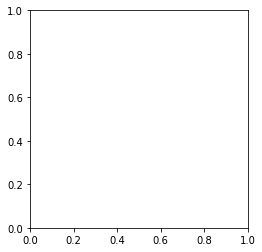

In [136]:
# #### PANDAS experement #####

root_dir = "../results_10X/PANDA/PANDA_random_5_s1"
data_size = 1
plot_splits(root_dir,axes[2],data_size,"black", "Randomly initialized weights","s")

root_dir = "../results_10X/PANDA/PANDA_imagenet_supervised_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[2],data_size,"salmon", "ImageNet SL","D")

root_dir = "../results_10X/PANDA/PANDA_imagenet_dino_baseline_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[2],data_size,"dodgerblue", "ImageNet SSL")

root_dir = "../results_10X/PANDA/PANDA_FlockNet1X_5_s1"
data_size = 1.28*10**6
plot_splits(root_dir,axes[2],data_size,"springgreen", "FlockNet 1X SSL", marker='^')


root_dir = "../results_10X/PANDA/PANDA_FlockNet2X_half_5_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[2],data_size,"pink", "FlockNet 2X 50 epoch SSL", marker='^')

root_dir = "../results_10X/PANDA/PANDA_FlockNet2X_5_s1"
data_size = 2.5*10**6
plot_splits(root_dir,axes[2],data_size,"springgreen", "FlockNet 2X 50 epoch SSL", marker='x')

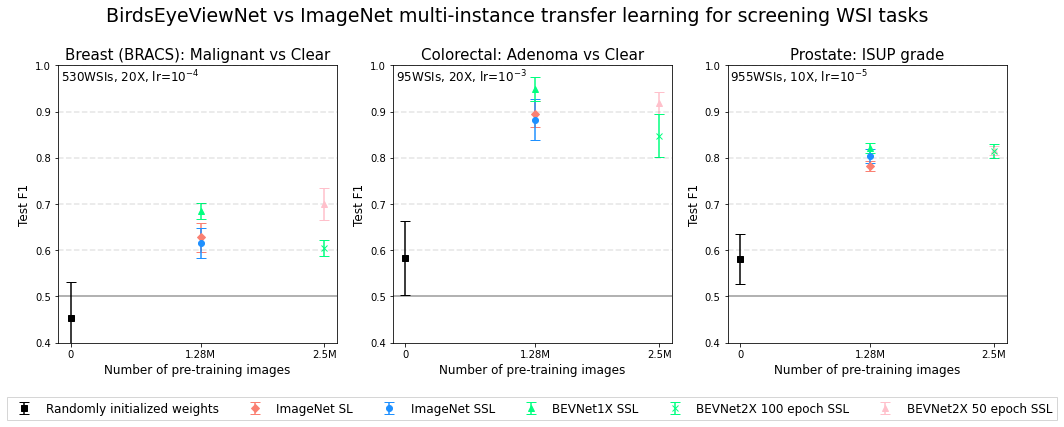

In [137]:
# log scale x axis
fig.suptitle('BirdsEyeViewNet vs ImageNet multi-instance transfer learning for screening WSI tasks', fontsize=19, y=1.04)

axes[0].legend(loc='lower center', bbox_to_anchor=(1.7, -0.3),fontsize=12, fancybox=False, shadow=False, ncol=6)

axes[0].set_title("Breast (BRACS): Malignant vs Clear", fontsize=15)
axes[0].text(.01, .99, '530WSIs, 20X, lr=$10^{-4}$', ha='left', va='top',fontsize=12, transform=axes[0].transAxes)

axes[1].set_title("Colorectal: Adenoma vs Clear", fontsize=15)
axes[1].text(.01, .99, '95WSIs, 20X, lr=$10^{-3}$', ha='left', va='top',fontsize=12, transform=axes[1].transAxes)

axes[2].set_title("Prostate: ISUP grade", fontsize=15)
axes[2].text(.01, .99, '955WSIs, 10X, lr=$10^{-5}$', ha='left', va='top',fontsize=12, transform=axes[2].transAxes)

# Loop over each axes and add dashed lines
for ax in axes.flat[:]:
    ax.axhline(0.5, linestyle='-', color='black',alpha=0.4)  # Add a dashed line at y=0
    ax.axhline(0.6, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.7, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.8, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(0.9, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.axhline(1, linestyle='--', color='black',alpha=0.1)  # Add a dashed line at y=0
    ax.set_ylim([0.40,1])

display(fig)
fig.savefig('../figures/All_downstream_tasks_screening.png', dpi=300 ,bbox_inches='tight', pad_inches=.2, facecolor='white')